<a href="https://colab.research.google.com/github/uervitonsantos/Algoritmo-PSO-para-otimiza-o-de-custo-de-manuten-o-preventiva/blob/main/Algoritmo_PSO_para_otimiza%C3%A7%C3%A3o_de_custo_de_manuten%C3%A7%C3%A3o_preventiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyswarms

In [117]:
import pyswarms as ps
import matplotlib.pyplot as plt
import numpy as np
import random

In [165]:
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)
from IPython.display import Image

In [166]:
def objective_function(x):
    list_of_severity = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

    cost_downtime  = 2.000 # custo por hora de inatividade do sistema
    maintenance_severity = random.choice(list_of_severity) # o gral de severidade aplicado na manutenção pode varia em uma escala de [10...100] %
    cost_maintenance  = (cost_downtime*maintenance_severity) # custo médio das manutenções
    failure_times = random.randint(1, 365) # periodo em que ocorre a falha do sistema

    # Calcula o valor da função para cada partícula.
    cost_total = (cost_maintenance*failure_times)
    return cost_total


In [172]:
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=1, options=options)
# Perform optimization
cost, best_interval = optimizer.optimize(objective_function, iters=1000)

2023-03-24 19:02:04,507 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=2
2023-03-24 19:02:06,187 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.0, best pos: [1.28942985]


In [173]:
# Print results
print(f"Intervalo de tempo ideal entre as atividades de manutenção: {best_interval}")

print('\nCusto: ', cost)
print('Posição: ', best_interval)

Intervalo de tempo ideal entre as atividades de manutenção: [1.28942985]

Custo:  2.0
Posição:  [1.28942985]


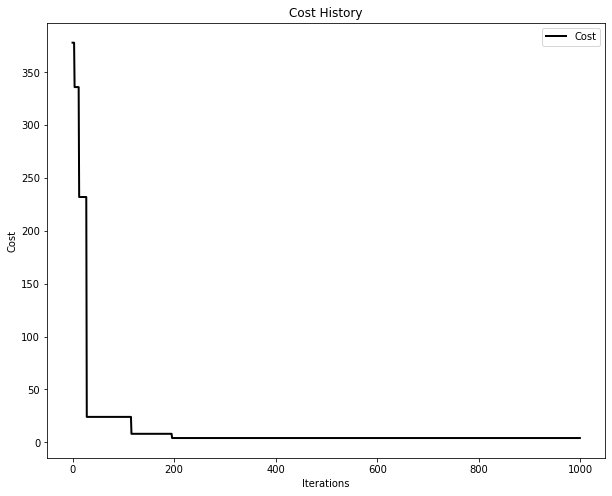

In [169]:
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()